In [3]:
!pip3 install numpy matplotlib tensorflow seaborn keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
#shape of numpy arrays
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)


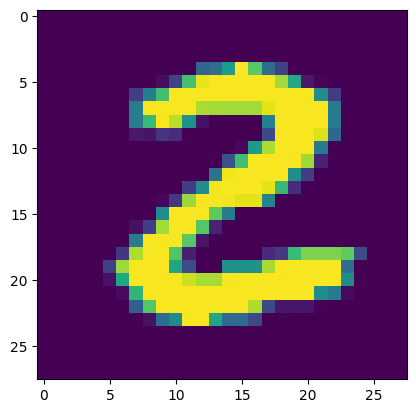

2


In [6]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

print(y_train[25])


In [7]:
#unique values in Y_rain
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
#scaling the values
x_train = x_train/255
x_test = x_test/255

In [9]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

C:\Users\SarahsBox\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer="sgd",loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6795 - loss: 1.1716 - val_accuracy: 0.8992 - val_loss: 0.3376
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9040 - loss: 0.3359 - val_accuracy: 0.9161 - val_loss: 0.2820
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9179 - loss: 0.2821 - val_accuracy: 0.9305 - val_loss: 0.2442
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9312 - loss: 0.2385 - val_accuracy: 0.9371 - val_loss: 0.2127
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9389 - loss: 0.2118 - val_accuracy: 0.9418 - val_loss: 0.1921
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9451 - loss: 0.1885 - val_accuracy: 0.9490 - val_loss: 0.1750
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9497 - loss: 0.1749 - val_accuracy: 0.9524 - val_loss: 0.1569
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9531 - loss: 0.

<Axes: >

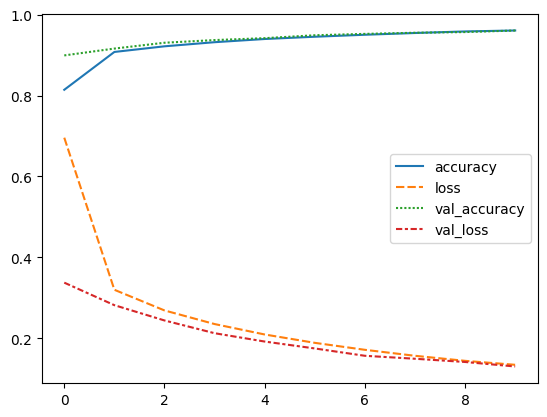

In [13]:
import seaborn as sns
sns.lineplot(model.history.history)

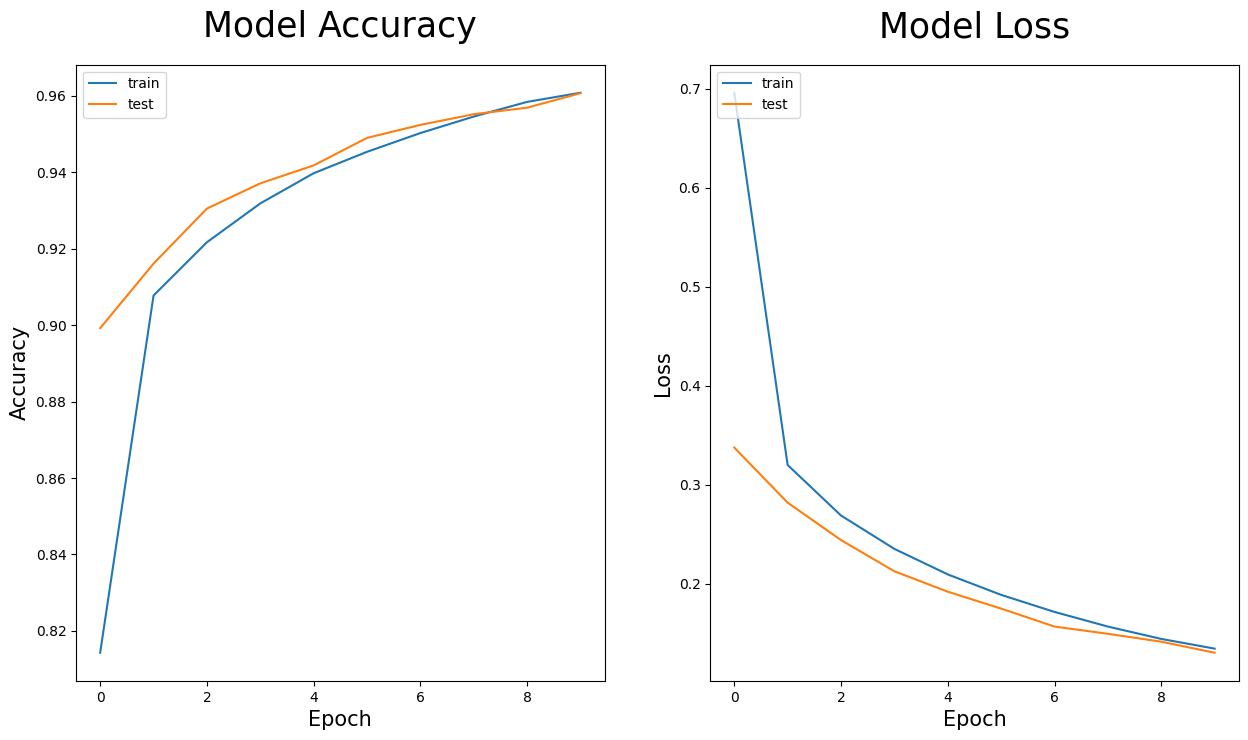

In [14]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[15,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9550 - loss: 0.1501


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


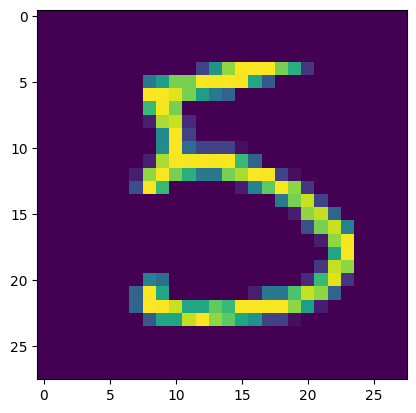

5


In [16]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))